In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import time
from torch.utils.data import DataLoader, Dataset
import random
from sklearn.model_selection import train_test_split
import torch.optim as optim
import subprocess

In [24]:
import sys

In [25]:
EC_Data = pd.read_csv("Combined_Data.csv")

In [26]:
EC_Data = EC_Data[["UniProtID", "EC"]]

In [27]:
path_str = "../../scratch/Str/proteinmpnn/mpnn_outputs/embeddings"
file_list = subprocess.run(f'ls {path_str}/*.npy', shell = True, text = True, capture_output = True).stdout
file_list = file_list.strip().split("\n")
structure_data = []
IDs = []
ECs = []
for file in file_list:
    data = np.load(file)
    flat_data = data.flatten()
    structure_data.append(flat_data)
    name = file.split("/")[-1]
    truncated_name = name.split("-")[1]
    print(truncated_name)
    IDs.append(truncated_name)
    EC = EC_Data[EC_Data["UniProtID"] == truncated_name].reset_index()
    if len(EC) > 0:
        EC_Num = EC["EC"][0]
        ECs.append(EC_Num)
        

A0AVI4
A0AVT1
A0PJZ3
A1L167
A1L3X0
A2PYH4
A2RTX5
A2RU49
A2RUC4
A2VDF0
A4D126
A4D256
A5LHX3
A5PLL7
A5YM72
A6NCW0
A6NDG6
A6NGE7
A6NGU5
A6NHC0
A6NIZ1
A6NK06
A6NK58
A6NNE9
A6NNS2
A6NNW6
A6NNY8
A8MQ27
A8MTL3
A8MUK1
A8MXV4
B0YJ81
B2RXH2
C9J2P7
C9JJH3
C9JLJ4
C9JPN9
C9JRZ8
C9JVI0
D6R901
D6R9N7
D6RA61
D6RBQ6
D6RCP7
D6RJB6
F5H284
O00115
O00116
O00141
O00142
O00148
O00154
O00167
O00187
O00194
O00204
O00217
O00219
O00237
O00238
O00299
O00303
O00308
O00311
O00329
O00338
O00391
O00408
O00411
O00418
O00429
O00442
O00443
O00444
O00462
O00469
O00506
O00507
O00519
O00571
O00584
O00587
O00625
O00635
O00743
O00746
O00748
O00750
O00754
O00757
O00762
O00763
O00764
O00767
O14494
O14495
O14522
O14556
O14569
O14578
O14595
O14607
O14638
O14646
O14647
O14672
O14678
O14684
O14717
O14730
O14732
O14733
O14734
O14735
O14744
O14746
O14756
O14757
O14772
O14773
O14792
O14802
O14807
O14829
O14830
O14832
O14841
O14874
O14880
O14920
O14929
O14933
O14936
O14939
O14965
O14975
O14976
O14983
O14986
O15021
O15033
O15047
O15054

P47897
P47985
P47989
P48052
P48147
P48163
P48426
P48448
P48449
P48454
P48506
P48637
P48651
P48728
P48729
P48730
P48735
P48736
P48775
P49137
P49189
P49221
P49247
P49326
P49327
P49336
P49354
P49356
P49419
P49427
P49441
P49448
P49459
P49585
P49588
P49589
P49590
P49591
P49593
P49619
P49641
P49642
P49662
P49674
P49736
P49748
P49753
P49759
P49760
P49761
P49789
P49821
P49840
P49841
P49862
P49888
P49902
P49903
P49914
P49915
P49916
P49917
P49961
P50053
P50135
P50213
P50225
P50226
P50281
P50336
P50416
P50440
P50570
P50579
P50583
P50613
P50747
P50750
P50876
P50897
P50993
P51003
P51148
P51149
P51153
P51159
P51160
P51178
P51451
P51452
P51530
P51570
P51580
P51589
P51606
P51617
P51648
P51649
P51659
P51668
P51687
P51688
P51690
P51784
P51812
P51813
P51817
P51828
P51841
P51854
P51857
P51878
P51955
P51956
P51957
P51965
P51993
P52209
P52333
P52429
P52564
P52758
P52788
P52789
P52790
P52824
P52848
P52849
P52888
P52895
P52961
P53004
P53041
P53350
P53355
P53396
P53582
P53597
P53602
P53609
P53611
P53634
P53667

Q8NBN7
Q8NBQ5
Q8NBR6
Q8NBS9
Q8NBZ7
Q8NC42
Q8NCC3
Q8NCE0
Q8NCE2
Q8NCG7
Q8NCH0
Q8NCL4
Q8NCN4
Q8NCR0
Q8NCW5
Q8NCW6
Q8ND25
Q8NDF8
Q8NDG6
Q8NDL9
Q8NDV1
Q8NE62
Q8NE63
Q8NEB5
Q8NEB9
Q8NEG5
Q8NEJ0
Q8NEK8
Q8NEL9
Q8NER5
Q8NES3
Q8NET6
Q8NEV1
Q8NEV4
Q8NF37
Q8NFA0
Q8NFD2
Q8NFF5
Q8NFI3
Q8NFM4
Q8NFP7
Q8NFU3
Q8NFU5
Q8NFU7
Q8NFV4
Q8NFW8
Q8NFZ0
Q8NG06
Q8NG08
Q8NG27
Q8NG66
Q8NG68
Q8NHG8
Q8NHM4
Q8NHM5
Q8NHQ9
Q8NHS2
Q8NHU3
Q8NHY2
Q8NI37
Q8TAC2
Q8TAS1
Q8TAT5
Q8TB92
Q8TBB1
Q8TBC4
Q8TBE9
Q8TBF2
Q8TBG4
Q8TBX8
Q8TBZ6
Q8TC12
Q8TC41
Q8TCD6
Q8TCG2
Q8TCG5
Q8TCJ2
Q8TCQ1
Q8TCS8
Q8TCT0
Q8TCT1
Q8TD08
Q8TD19
Q8TD30
Q8TDB6
Q8TDC3
Q8TDD1
Q8TDG4
Q8TDI0
Q8TDN7
Q8TDQ7
Q8TDR2
Q8TDX5
Q8TDX6
Q8TDX7
Q8TDZ2
Q8TE04
Q8TE49
Q8TE77
Q8TE96
Q8TEA8
Q8TEB7
Q8TEB9
Q8TEC5
Q8TED1
Q8TEJ3
Q8TEK3
Q8TET4
Q8TEY7
Q8TF42
Q8TF46
Q8TF62
Q8TF76
Q8WTQ7
Q8WTR2
Q8WTR4
Q8WTS1
Q8WTS6
Q8WTX9
Q8WU03
Q8WU08
Q8WU17
Q8WU67
Q8WUA2
Q8WUD1
Q8WUD6
Q8WUI4
Q8WUJ3
Q8WUK0
Q8WUX2
Q8WV22
Q8WV44
Q8WV74
Q8WVB3
Q8WVD3
Q8WVN8
Q8WVQ1
Q8WVX9
Q8WVY7
Q8WVZ1
Q8WVZ7
Q8WWF5
Q8WWH5

U3KPV4


In [28]:
EC = EC_Data["EC"].tolist()
EC = set(EC)
EC2idx = {ec: idx for idx, ec in enumerate(EC)}

In [29]:
print(ECs[0:10])
print(IDs[0:10])
print(structure_data[0:10])

['EC 2.3.2.27', 'EC 6.2.1.45', 'EC 2.4.2.42', 'EC 2.3.2.23', 'EC 2.3.1.199', 'EC 3.6.4.12', 'EC 6.1.1.3', 'EC 2.7.1.81', 'EC 1.14.11.42', 'EC 5.1.3.29']
['A0AVI4', 'A0AVT1', 'A0PJZ3', 'A1L167', 'A1L3X0', 'A2PYH4', 'A2RTX5', 'A2RU49', 'A2RUC4', 'A2VDF0']
[array([ 0.28282133,  0.10605881, -0.7285113 , ...,  0.4390773 ,
        0.5511208 , -0.6604664 ], dtype=float32), array([ 0.18897377,  0.20552064, -0.8184022 , ...,  0.38834557,
        0.79198724, -0.6997267 ], dtype=float32), array([ 0.4777598 ,  0.10360774,  0.09014627, ...,  0.2595771 ,
        0.63160515, -0.5266846 ], dtype=float32), array([ 0.02450403, -0.11680026, -0.6818162 , ...,  0.55970407,
        0.70613104, -0.38490778], dtype=float32), array([ 0.43486935, -0.16304801,  0.08005548, ...,  1.0490626 ,
        0.38082594, -0.6807587 ], dtype=float32), array([ 0.29174155,  0.29512125, -1.0558941 , ...,  0.9973925 ,
        0.7501239 , -0.7170994 ], dtype=float32), array([ 0.42114136,  0.19636197, -0.3813365 , ...,  0.5511377

In [30]:
num_classes = len(EC)

In [31]:
print(num_classes)

1342


In [32]:
max_length = max([len(x) for x in structure_data])

In [33]:
max_length

345088

In [34]:
class StructureDataset(Dataset):
    def __init__(self, Struct_List, ID_List, EC_List):
        super().__init__()
        self.ID = ID_List
        self.labels = [EC2idx.get(ec, -1) for ec in EC_List]
        self.embeddings = []
        for struct in Struct_List:
            embedding = torch.from_numpy(struct)
            if len(embedding != max_length):
                pad_len = max_length - embedding.size(0)
                embedding = F.pad(embedding, (pad_len, 0), mode='constant', value=0)
            self.embeddings.append(embedding)

    def __len__(self):
        return len(self.ID)

    def __getitem__(self, index):
        emb = self.embeddings[index]
        label = torch.tensor(self.labels[index], dtype=torch.long)
        ID = self.ID[index]
        return ID, emb, label

In [35]:
Train_Struct_Data, Test_Struct_Data, Train_ID_Data, Test_ID_Data, Train_EC_Data, Test_EC_Data = train_test_split(structure_data, IDs, ECs, test_size=0.2, random_state=0)

In [36]:
Train_Struct_Data, Val_Struct_Data, Train_ID_Data, Val_ID_Data, Train_EC_Data, Val_EC_Data = train_test_split(Train_Struct_Data, Train_ID_Data, Train_EC_Data, test_size=0.125, random_state=64)

In [37]:
Train_Dataset = StructureDataset(Train_Struct_Data, Train_ID_Data, Train_EC_Data)
Val_Dataset = StructureDataset(Val_Struct_Data, Val_ID_Data, Val_EC_Data)
Test_Dataset = StructureDataset(Test_Struct_Data, Test_ID_Data, Test_EC_Data)

In [38]:
class TransformerClassifier(nn.Module):
    def __init__(self, embed_dim=5000, num_heads=4, num_layers=2, ff_dim=1000, num_classes=1342):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Linear(345088, embed_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(embed_dim, num_heads, ff_dim)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        #self.pooling = nn.AdaptiveAvgPool1d(64) 
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.encoder(x)
        #x = self.pooling(x).squeeze(-1)
        return self.fc(x)

In [39]:
def train_model_structure(model, train_dataset, val_dataset, num_classes, epochs=100, batch_size=256, lr=1e-3, patience=10, device='cuda:0'):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_acc = 0
    patience_counter = 0
    best_ckpt = None

    for epoch in range(epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for IDs, embs, labels in train_loader:
            # TODO: backpropagation
            #####
            model = model.to(device)
            embs = embs.to(device)
            labels = labels.to(device)
            outputs = model(embs)
            outputs = outputs.to(device)
            loss = criterion(outputs, labels)
             #zero's grad for backprogation
            optimizer.zero_grad()

            #backpropagates
            loss.backward()

            #steps forward
            optimizer.step()
            #####
            total_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for IDs, embs, labels in val_loader:
                # TODO: inference
                #####
                model = model.to(device)
                embs = embs.to(device)
                labels = labels.to(device)
                outputs = model(embs)
                outputs = outputs.to(device)
                pred = outputs.argmax(dim=1)
                #####
                correct += (pred == labels).sum().item()
                total += labels.size(0)

        val_acc = correct / total
        print(f'Epoch {epoch+1}: Train Loss={total_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}')

        # Early stopping
        if val_acc > best_acc:
            best_acc = val_acc
            best_ckpt = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    return model, best_ckpt, best_acc

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = TransformerClassifier().to(device)
model, best_ckpt,_ = train_model_structure(model, Train_Dataset, Val_Dataset, num_classes,epochs=500, batch_size=128, lr=5e-5, patience=50, device=device)
model.load_state_dict(best_ckpt)

/home/hice1/vraghavan40/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1: Train Loss=144.7647, Train Acc=0.0439, Val Acc=0.0085
Epoch 2: Train Loss=125.0096, Train Acc=0.0487, Val Acc=0.0620
Epoch 3: Train Loss=122.3031, Train Acc=0.0724, Val Acc=0.0648
Epoch 4: Train Loss=118.0470, Train Acc=0.0873, Val Acc=0.1014
Epoch 5: Train Loss=103.1652, Train Acc=0.1924, Val Acc=0.1155
Epoch 6: Train Loss=49.7410, Train Acc=0.5650, Val Acc=0.2366
Epoch 7: Train Loss=9.4651, Train Acc=0.9252, Val Acc=0.2113
Epoch 8: Train Loss=2.3428, Train Acc=0.9851, Val Acc=0.2366
Epoch 9: Train Loss=0.8554, Train Acc=0.9915, Val Acc=0.2563
Epoch 10: Train Loss=0.7868, Train Acc=0.9911, Val Acc=0.2648
Epoch 11: Train Loss=0.5639, Train Acc=0.9932, Val Acc=0.2169
Epoch 12: Train Loss=0.6676, Train Acc=0.9960, Val Acc=0.2873
Epoch 13: Train Loss=0.6012, Train Acc=0.9948, Val Acc=0.2676
Epoch 14: Train Loss=0.3610, Train Acc=0.9968, Val Acc=0.2648
Epoch 15: Train Loss=0.3564, Train Acc=0.9956, Val Acc=0.2761
Epoch 16: Train Loss=0.2277, Train Acc=0.9960, Val Acc=0.2620
Epoch 

<All keys matched successfully>

In [ ]:
epochs = [200,300,400,500]
patiences = [20,30,40,50]
lrs = [1e-5,5e-5,1e-4,5e-4]
batch_sizes = [32,64,128,256]
best_acc = 0
best_epoch = -100
best_patience = -100
best_lr = -100
best_batch = -100
for epoch in epochs:
    for patience in patiences:
        for lr in lrs:
            for batch_size in batch_sizes:
                model = TransformerClassifier().to(device)
                model, best_ckpt, curr_acc = train_model_structure(model, Train_Dataset, Val_Dataset, num_classes,epochs=epoch, batch_size=batch_size, lr=lr, patience=patience, device=device)
                if (curr_acc > best_acc):
                    best_acc = curr_acc
                    best_epoch = epoch
                    best_patience = patience
                    best_lr = lr
                    best_batch = batch_size
                    print(f"Current Best Hyperparameters: Epochs: {epoch}, Patience: {patience}, Learning_Rate: {lr}, Batch_Size: {batch_size} | Current Best Val Accuracy: {best_acc})")

In [ ]:
print(best_acc, best_epoch, best_patience, best_lr, best_batch)

In [ ]:
num_layers = [1,2,4]
num_heads=[1,2,4]
ff_dim = [1000,2000,10000]
embed_dim = [500,1000,5000]

best_layers = 0
best_ff = 0
best_heads = 0
best_embed = 0
best_acc = 0
for layer in num_layers:
    for head in heads:
        for ff in ff_dim:
            for embed in embed_dim:
                model = TransformerClassifier(embed_dim=embed, num_heads=head, num_layers=layer, ff_dim=ff).to(device)
                model, best_ckpt, curr_acc = train_model_structure(model, Train_Dataset, Val_Dataset, num_classes,epochs=300, batch_size=64, lr=7e-4, patience=50, device=device)
                if (curr_acc > best_acc):
                    best_acc = curr_acc
                    best_layers = layer
                    best_ff = ff
                    best_embed = embed
                    best_heads = head
                    print(f"Current Best Hyperparameters: Layers: {best_layers}, FF_dim: {dim}, Embed_dim: {embed}, Heads: {head} | Current Best Val Accuracy: {best_acc})")

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = TransformerClassifier(embed_dim=5000, num_heads=4, num_layers=2, ff_dim=1000).to(device)
model, best_ckpt,_ = train_model_structure(model, Train_Dataset, Val_Dataset, num_classes,epochs=500, batch_size=128, lr=5e-5, patience=50, device=device)
model.load_state_dict(best_ckpt)

In [41]:
model.eval()
preds = []
test_loader = DataLoader(Test_Dataset, batch_size=64)
ID_List = []
correct, total = 0, 0
weights = []
real_ECs = []
with torch.no_grad():
    for IDs, embs, labels in test_loader:
        model = model.to(device)
        embs = embs.to(device)
        labels = labels.to(device)
        outputs = model(embs)
        pred = outputs.argmax(dim=1)
        correct += (pred == labels).sum().item()
        total += labels.size(0)
        pred = pred.detach().cpu()
        ID_List += IDs
        labels = labels.detach().cpu()
        outputs = outputs.detach().cpu()
        preds += pred.tolist()
        weights += outputs.tolist()
        real_ECs += labels.tolist()
test_acc = correct / total
print(test_acc)

0.24225352112676057


In [172]:
full_data = StructureDataset(structure_data, IDs, ECs)

In [173]:
full_data.__len__()

3550

In [174]:
len(IDs)

3550

In [175]:
model.eval()
preds = []
full_loader = DataLoader(full_data, batch_size=64)
ID_List = []
weights = []
real_ECs = []
with torch.no_grad():
    for IDs, embs, labels in full_loader:
        model = model.to(device)
        embs = embs.to(device)
        labels = labels.to(device)
        outputs = model(embs)
        pred = outputs.argmax(dim=1)
        pred = pred.detach().cpu()
        ID_List += IDs
        labels = labels.detach().cpu()
        outputs = outputs.detach().cpu()
        preds += pred.tolist()
        weights += outputs.tolist()
        real_ECs += labels.tolist()

In [42]:
ECs = list(EC2idx.keys())
Idxs = list(EC2idx.values())
Idxs2ECs = dict(zip(Idxs, ECs))

In [43]:
preds = [Idxs2ECs[pred] for pred in preds]

In [44]:
real_EC_not_idx = [Idxs2ECs[x] for x in real_ECs]

In [45]:
df_preds = pd.DataFrame({"UniProtID" : ID_List, "Pred_EC": preds, "Weights" : weights, "EC": real_EC_not_idx})
df_preds.to_csv('Structure_Classifier_Test.csv', index=False)

In [17]:
def train_model_structure(model, train_dataset, val_dataset, num_classes, epochs=100, batch_size=256, lr=1e-3, patience=10, device='cuda:0'):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_acc = 0
    patience_counter = 0
    best_ckpt = None
    
    train_losses = []
    val_accs = []
    train_accs = []

    for epoch in range(epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for IDs, embs, labels in train_loader:
            # TODO: backpropagation
            #####
            model = model.to(device)
            embs = embs.to(device)
            labels = labels.to(device)
            outputs = model(embs)
            outputs = outputs.to(device)
            loss = criterion(outputs, labels)
             #zero's grad for backprogation
            optimizer.zero_grad()

            #backpropagates
            loss.backward()

            #steps forward
            optimizer.step()
            #####
            total_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for IDs, embs, labels in val_loader:
                # TODO: inference
                #####
                model = model.to(device)
                embs = embs.to(device)
                labels = labels.to(device)
                outputs = model(embs)
                outputs = outputs.to(device)
                pred = outputs.argmax(dim=1)
                #####
                correct += (pred == labels).sum().item()
                total += labels.size(0)

        val_acc = correct / total
        print(f'Epoch {epoch+1}: Train Loss={total_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}')
        train_losses.append(total_loss)
        val_accs.append(val_acc)
        train_accs.append(train_acc)

        # Early stopping
        if val_acc > best_acc:
            best_acc = val_acc
            best_ckpt = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    return model, best_ckpt, best_acc, train_losses, val_accs, train_accs

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = TransformerClassifier(embed_dim=5000, num_heads=4, num_layers=2, ff_dim=1000).to(device)
_,_,_,train_losses, val_accs, train_accs = train_model_structure(model, Train_Dataset, Val_Dataset, num_classes,epochs=500, batch_size=128, lr=5e-5, patience=20, device=device)

/home/hice1/vraghavan40/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1: Train Loss=147.1854, Train Acc=0.0406, Val Acc=0.0254
Epoch 2: Train Loss=124.0226, Train Acc=0.0628, Val Acc=0.0761
Epoch 3: Train Loss=121.7824, Train Acc=0.0724, Val Acc=0.0732
Epoch 4: Train Loss=119.0730, Train Acc=0.0845, Val Acc=0.0479
Epoch 5: Train Loss=111.9287, Train Acc=0.1376, Val Acc=0.0732
Epoch 6: Train Loss=107.7394, Train Acc=0.1388, Val Acc=0.0507
Epoch 7: Train Loss=108.6143, Train Acc=0.1425, Val Acc=0.0592
Epoch 8: Train Loss=104.2189, Train Acc=0.1871, Val Acc=0.1042
Epoch 9: Train Loss=98.6517, Train Acc=0.2161, Val Acc=0.0873
Epoch 10: Train Loss=97.0983, Train Acc=0.2016, Val Acc=0.0676
Epoch 11: Train Loss=82.1673, Train Acc=0.3070, Val Acc=0.1465
Epoch 12: Train Loss=64.8392, Train Acc=0.4765, Val Acc=0.1831
Epoch 13: Train Loss=41.9791, Train Acc=0.6390, Val Acc=0.2056
Epoch 14: Train Loss=35.7765, Train Acc=0.7223, Val Acc=0.2254
Epoch 15: Train Loss=25.9714, Train Acc=0.8093, Val Acc=0.2423
Epoch 16: Train Loss=12.9942, Train Acc=0.8982, Val Acc=

NameError: name 'best_ckpt' is not defined

In [19]:
import matplotlib.pyplot as plt

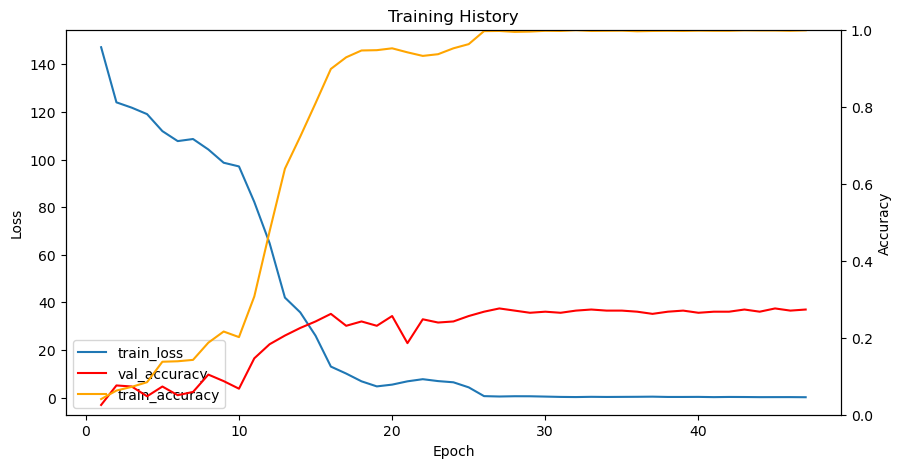

In [22]:
# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

epochs = range(1, 48)

# Plot loss and val_loss on the first y-axis
line1 = ax1.plot(epochs, train_losses, label='train_loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Plot the computed metric on the second y-axis
line2 = ax2.plot(epochs, val_accs, color='red', label='val_accuracy')
line3 = ax2.plot(epochs, train_accs, color='orange', label='train_accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_ylim([0, 1])

# Combine the lines from both y-axes and create a single legend
lines = line1 + line2 + line3
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower left')

# Show the plot
plt.title("Training History")
plt.show()